In [28]:
%matplotlib inline
from IPython.display import display

import pandas as pd
import matplotlib as mpl
mpl.rcParams['legend.scatterpoints'] = 1
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [25]:
#import NLA 2007 lat/long csv
nla07lakeinfo = pd.DataFrame.from_csv('NLA/NLA2007_SampledLakeInformation_20091113.csv')
# nla07lakeinfo.head()

#import NLA 2007 chla
nla07chla = pd.DataFrame.from_csv('NLA/NLA2007_WaterQuality_20091123.csv')
# nla07chla['CHLA'].head()

nla07 = nla07lakeinfo[['LON_DD','LAT_DD']].join(nla07chla['CHLA']) 
#### how does this join when SITE_ID are the same? double check ####
nla07.head()

,LON_DD,LAT_DD,CHLA
SITE_ID,,,
NLA06608-0001,-114.021840,48.979029,0.240
NLA06608-0002,-79.983791,33.036064,3.840
NLA06608-0002,-79.983791,33.036064,20.053
NLA06608-0002,-79.983791,33.036064,20.880
NLA06608-0002,-79.983791,33.036064,3.840


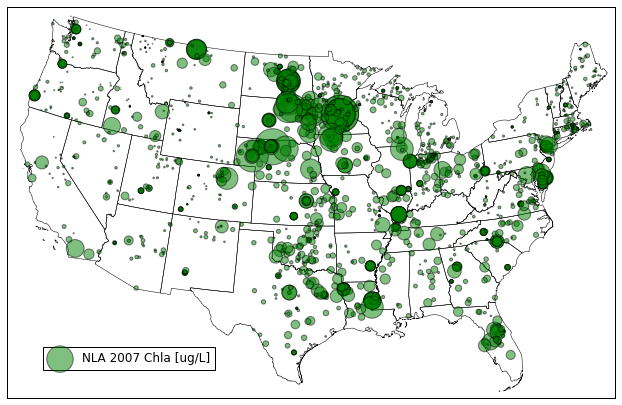

In [29]:
# Plot NLA Lat/longs
fig = plt.figure(figsize=(14,7))

# Create a Basemap (http://stackoverflow.com/questions/7586384/color-states-with-pythons-matplotlib-basemap)
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.readshapefile('USstatesSHP/st99_d00', name='states', drawbounds=True) # Load US states shapefile

# Add NLA data
x,y = map(nla07['LON_DD'].values, nla07['LAT_DD'].values)
map.scatter(x, y, s=1.5*nla07['CHLA'],c='green',alpha=0.5,
            label='NLA 2007 Chla [ug/L]',zorder=10)
plt.legend(bbox_to_anchor=(0.2,0.1), loc='center')
plt.show()